Filename: nH1.0e+00_lam1.00um_theobs0.00_Ldnu_xcentr.txt, lam: 1.0, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.26um_theobs0.00_Ldnu_xcentr.txt, lam: 1.26, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.53um_theobs0.00_Ldnu_xcentr.txt, lam: 1.53, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.79um_theobs0.00_Ldnu_xcentr.txt, lam: 1.79, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.05um_theobs0.00_Ldnu_xcentr.txt, lam: 2.05, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.32um_theobs0.00_Ldnu_xcentr.txt, lam: 2.32, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.58um_theobs0.00_Ldnu_xcentr.txt, lam: 2.58, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.84um_theobs0.00_Ldnu_xcentr.txt, lam: 2.84, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam3.11um_theobs0.00_Ldnu_xcentr.txt, lam: 3.11, theobs: 0.0
10292728.3 41170913200.0

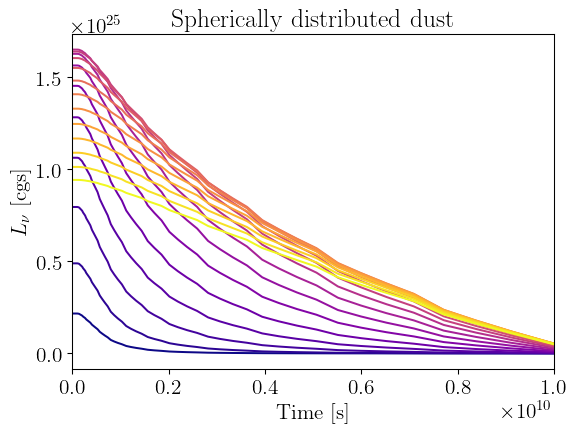

'\nif __name__ == "__main__":\n    if len(sys.argv) != 2:\n        print("Usage: python3 script_file.py data_file.txt")\n    else:\n        filename = sys.argv[1]\n        main(filename)\n'

<Figure size 614.4x460.8 with 0 Axes>

In [37]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import sys
import re
import const

CUSTOM_PLOT_STYLE = {
    "text.usetex": True,

    "font.family": "serif",
    "font.size": 16,

    # Set some default sizes, so we don't need to include them in each call
    "lines.markersize": 1.5,
    "lines.linewidth": 1.5,
    # "errorbar.capsize": 3,

    # Set savefig to use bbox_inches="tight" by default
    "savefig.bbox": "tight",
    "savefig.facecolor": "none",
    "savefig.dpi": 300,

    # Higher DPI for sharper inline images
    "figure.dpi": 96
}

matplotlib.rcdefaults()
matplotlib.rcParams.update(CUSTOM_PLOT_STYLE)

# Define the regular expression pattern
pattern = r'nH[0-9\.e\+\-]+_lam([0-9\.e\+\-]+)um_theobs([0-9\.e\+\-]+)_Ldnu_xcentr\.txt'

lams = np.linspace(1, 6, 20)
base_filename = "nH1.0e+00_lam{:.2f}um_theobs0.00_Ldnu_xcentr.txt"
filenames = [base_filename.format(lam) for lam in lams]

colormap = plt.cm.plasma
colors = [colormap(i) for i in np.linspace(0, 1, len(filenames))]

peak_Ls = np.zeros(len(filenames))

# Function to extract values from filename
def extract_values(filename):
    match = re.match(pattern, filename)
    if match:
        lam = float(match.group(1))
        theobs = float(match.group(2))
        return lam, theobs
    else:
        return None, None

# Initialize the plot
fig, ax = plt.subplots()

ax.set_xlabel('Time [s]')
ax.set_ylabel('$L_{\\nu}$ [cgs]')

for i in range(len(filenames)):
    filename = filenames[i]
    if filename.endswith('.txt'):
        lam, theobs = extract_values(filename)
        if lam is not None and theobs is not None:
            print(f'Filename: {filename}, lam: {lam}, theobs: {theobs}')
    
    with open(filename, 'r') as file:
        first_line = file.readline()
        first_row_data = first_line.split()[3:]
    
    # Assign the three floats to variables
    tobsmin, tobsmax, Ntobs = map(float, first_row_data)
    #tobsmax = tobsmax-tobsmin
    print(tobsmin, tobsmax, Ntobs)
    # Load the data from the text file
    data = np.genfromtxt(filename, dtype=float, skip_header=2, filling_values=np.nan)
    
    Ldnu_cgs = data[0]
    xcentr_pc = data[1]
    
    peak_Ls[i] = np.max(Ldnu_cgs)
    
    log_tobsmin = np.log10(tobsmin)
    log_tobsmax = np.log10(tobsmax)
    
    # Create the logarithmic space with normalized values
    tobs = np.logspace(log_tobsmin, log_tobsmax, num=int(Ntobs), base=10)
    #tobs = tobs/(60*60*24)

    ax.plot(tobs, Ldnu_cgs, color=colors[i], label="$\\lambda = $"+str(lam)+"$\\mu$m")

L_cutoff = 10**38/(3*10**8*10**6/lam)

plt.title("Spherically distributed dust")
#plt.legend()
plt.xlim(left=0, right=1e10)
print(L_cutoff)
#plt.ylim(bottom=L_cutoff)
fig.tight_layout()  # Ensure the plot layout is tidy
plt.show()   

plotfile="plot_l"+str(lam)+"theobs"+str(theobs)+".png"
plt.savefig("newplot.pdf")

Filename: nH1.0e+00_lam1.00um_theobs0.00_Ldnu_xcentr.txt, lam: 1.0, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.26um_theobs0.00_Ldnu_xcentr.txt, lam: 1.26, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.53um_theobs0.00_Ldnu_xcentr.txt, lam: 1.53, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.79um_theobs0.00_Ldnu_xcentr.txt, lam: 1.79, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.05um_theobs0.00_Ldnu_xcentr.txt, lam: 2.05, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.32um_theobs0.00_Ldnu_xcentr.txt, lam: 2.32, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.58um_theobs0.00_Ldnu_xcentr.txt, lam: 2.58, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.84um_theobs0.00_Ldnu_xcentr.txt, lam: 2.84, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam3.11um_theobs0.00_Ldnu_xcentr.txt, lam: 3.11, theobs: 0.0
10292728.3 41170913200.0

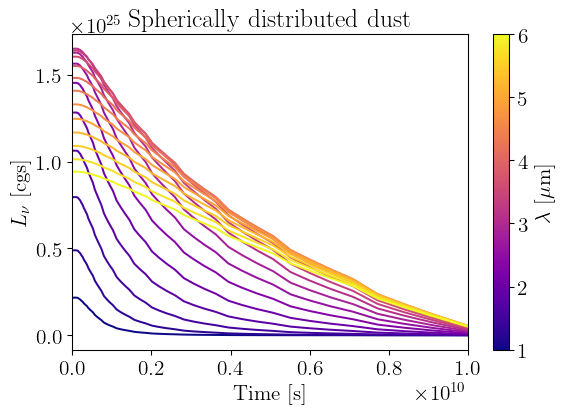

<Figure size 614.4x460.8 with 0 Axes>

In [63]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import re

CUSTOM_PLOT_STYLE = {
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "lines.markersize": 1.5,
    "lines.linewidth": 1.5,
    "savefig.bbox": "tight",
    "savefig.facecolor": "none",
    "savefig.dpi": 300,
    "figure.dpi": 96
}

matplotlib.rcdefaults()
matplotlib.rcParams.update(CUSTOM_PLOT_STYLE)

# Define the regular expression pattern
pattern = r'nH[0-9\.e\+\-]+_lam([0-9\.e\+\-]+)um_theobs([0-9\.e\+\-]+)_Ldnu_xcentr\.txt'

lams = np.linspace(1, 6, 20)
base_filename = "nH1.0e+00_lam{:.2f}um_theobs0.00_Ldnu_xcentr.txt"
filenames = [base_filename.format(lam) for lam in lams]

colormap = plt.cm.plasma
norm = plt.Normalize(vmin=min(lams), vmax=max(lams))  # Normalize lam values
colors = [colormap(norm(lam)) for lam in lams]

peak_Ls = np.zeros(len(filenames))

# Function to extract values from filename
def extract_values(filename):
    match = re.match(pattern, filename)
    if match:
        lam = float(match.group(1))
        theobs = float(match.group(2))
        return lam, theobs
    else:
        return None, None

# Initialize the plot
fig, ax = plt.subplots()

ax.set_xlabel('Time [s]')
ax.set_ylabel('$L_{\\nu}$ [cgs]')

for i in range(len(filenames)):
    filename = filenames[i]
    if filename.endswith('.txt'):
        lam, theobs = extract_values(filename)
        if lam is not None and theobs is not None:
            print(f'Filename: {filename}, lam: {lam}, theobs: {theobs}')
    
    with open(filename, 'r') as file:
        first_line = file.readline()
        first_row_data = first_line.split()[3:]
    
    tobsmin, tobsmax, Ntobs = map(float, first_row_data)
    print(tobsmin, tobsmax, Ntobs)
    
    data = np.genfromtxt(filename, dtype=float, skip_header=2, filling_values=np.nan)
    
    Ldnu_cgs = data[0]
    xcentr_pc = data[1]
    
    peak_Ls[i] = np.max(Ldnu_cgs)
    
    log_tobsmin = np.log10(tobsmin)
    log_tobsmax = np.log10(tobsmax)
    
    tobs = np.logspace(log_tobsmin, log_tobsmax, num=int(Ntobs), base=10)

    ax.plot(tobs, Ldnu_cgs, color=colors[i])

L_cutoff = 10**38/(3*10**8*10**6/lam)

plt.title("Spherically distributed dust")
plt.xlim(left=0, right=1e10)
print(L_cutoff)

# Create a ScalarMappable and add the colorbar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("$\\lambda$ [$\mu$m]")

fig.tight_layout()  # Ensure the plot layout is tidy
plt.show()   

plotfile="plot_l"+str(lam)+"theobs"+str(theobs)+".png"
plt.savefig("newplot.pdf")


Filename: nH1.0e+00_lam1.00um_theobs0.00_Ldnu_xcentr.txt, lam: 1.0, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.26um_theobs0.00_Ldnu_xcentr.txt, lam: 1.26, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.53um_theobs0.00_Ldnu_xcentr.txt, lam: 1.53, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.79um_theobs0.00_Ldnu_xcentr.txt, lam: 1.79, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.05um_theobs0.00_Ldnu_xcentr.txt, lam: 2.05, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.32um_theobs0.00_Ldnu_xcentr.txt, lam: 2.32, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.58um_theobs0.00_Ldnu_xcentr.txt, lam: 2.58, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.84um_theobs0.00_Ldnu_xcentr.txt, lam: 2.84, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam3.11um_theobs0.00_Ldnu_xcentr.txt, lam: 3.11, theobs: 0.0
10292728.3 41170913200.0

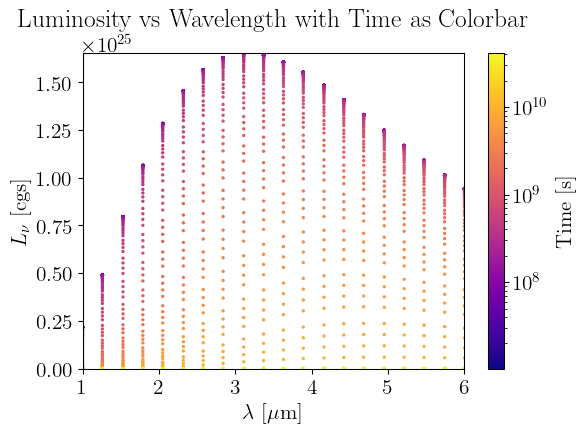

<Figure size 614.4x460.8 with 0 Axes>

In [83]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
import re

CUSTOM_PLOT_STYLE = {
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "lines.markersize": 1.5,
    "lines.linewidth": 1.5,
    "savefig.bbox": "tight",
    "savefig.facecolor": "none",
    "savefig.dpi": 300,
    "figure.dpi": 96
}

matplotlib.rcdefaults()
matplotlib.rcParams.update(CUSTOM_PLOT_STYLE)

# Define the regular expression pattern
pattern = r'nH[0-9\.e\+\-]+_lam([0-9\.e\+\-]+)um_theobs([0-9\.e\+\-]+)_Ldnu_xcentr\.txt'

lams = np.linspace(1, 6, 20)
base_filename = "nH1.0e+00_lam{:.2f}um_theobs0.00_Ldnu_xcentr.txt"
filenames = [base_filename.format(lam) for lam in lams]

colormap = plt.cm.plasma

# Initialize the plot
fig, ax = plt.subplots()

ax.set_xlabel('$\\lambda$ [$\mu$m]')
ax.set_ylabel('$L_{\\nu}$ [cgs]')

# For the colorbar, we need to collect all the time values and Ldnu values
all_tobs = []
all_lams = []
all_Ldnu_cgs = []

def extract_values(filename):
    match = re.match(pattern, filename)
    if match:
        lam = float(match.group(1))
        theobs = float(match.group(2))
        return lam, theobs
    else:
        return None, None

for i in range(len(filenames)):
    filename = filenames[i]
    if filename.endswith('.txt'):
        lam, theobs = extract_values(filename)
        if lam is not None and theobs is not None:
            print(f'Filename: {filename}, lam: {lam}, theobs: {theobs}')
    
    with open(filename, 'r') as file:
        first_line = file.readline()
        first_row_data = first_line.split()[3:]
    
    tobsmin, tobsmax, Ntobs = map(float, first_row_data)
    print(tobsmin, tobsmax, Ntobs)
    
    data = np.genfromtxt(filename, dtype=float, skip_header=2, filling_values=np.nan)
    
    Ldnu_cgs = data[0]
    
    log_tobsmin = np.log10(tobsmin)
    log_tobsmax = np.log10(tobsmax)
    
    tobs = np.logspace(log_tobsmin, log_tobsmax, num=int(Ntobs), base=10)
    
    all_tobs.extend(tobs)
    all_lams.extend([lam] * len(tobs))
    all_Ldnu_cgs.extend(Ldnu_cgs)

# Scatter plot with time as the color
sc = ax.scatter(all_lams, all_Ldnu_cgs, c=all_tobs, cmap=colormap, norm=mcolors.LogNorm())

plt.title("Luminosity vs Wavelength with Time as Colorbar")
plt.xlim(left=min(lams), right=max(lams))
plt.ylim(bottom=min(all_Ldnu_cgs), top=max(all_Ldnu_cgs))

# Add colorbar
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Time [s]")

fig.tight_layout()  # Ensure the plot layout is tidy
plt.show()   

plotfile="plot_l"+str(lam)+"theobs"+str(theobs)+".png"
plt.savefig("newplot.pdf")


Filename: nH1.0e+00_lam1.00um_theobs0.00_Ldnu_xcentr.txt, lam: 1.0, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.26um_theobs0.00_Ldnu_xcentr.txt, lam: 1.26, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.53um_theobs0.00_Ldnu_xcentr.txt, lam: 1.53, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam1.79um_theobs0.00_Ldnu_xcentr.txt, lam: 1.79, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.05um_theobs0.00_Ldnu_xcentr.txt, lam: 2.05, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.32um_theobs0.00_Ldnu_xcentr.txt, lam: 2.32, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.58um_theobs0.00_Ldnu_xcentr.txt, lam: 2.58, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam2.84um_theobs0.00_Ldnu_xcentr.txt, lam: 2.84, theobs: 0.0
10292728.3 41170913200.0 100.0
Filename: nH1.0e+00_lam3.11um_theobs0.00_Ldnu_xcentr.txt, lam: 3.11, theobs: 0.0
10292728.3 41170913200.0

/tmp/ipykernel_214491/2654711497.py:89: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


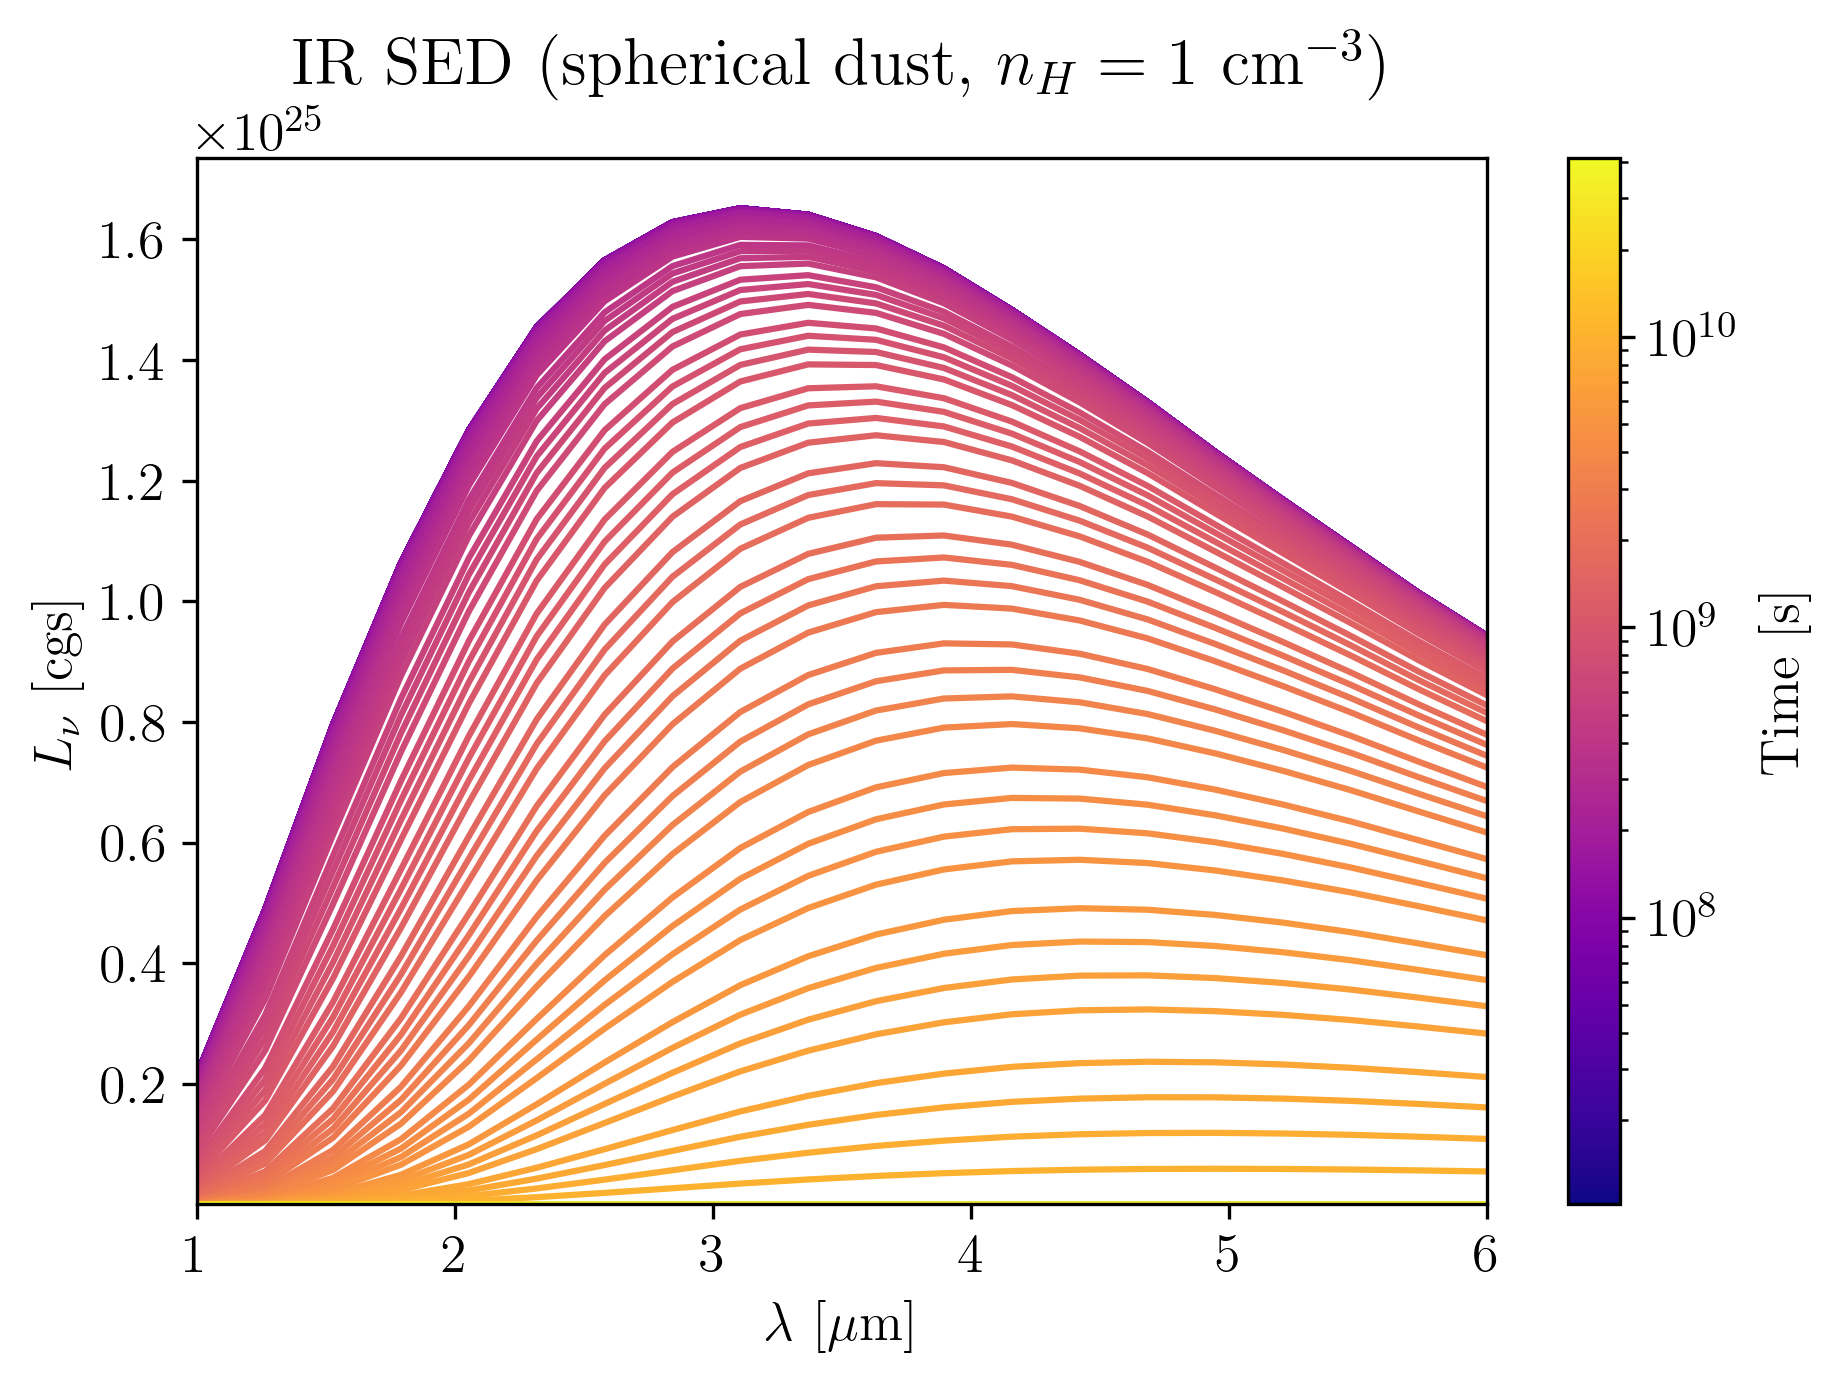

In [114]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import re

CUSTOM_PLOT_STYLE = {
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 13,
    "lines.markersize": 1.5,
    "lines.linewidth": 1.5,
    "savefig.bbox": "tight",
    "savefig.facecolor": "none",
    "savefig.dpi": 300,
    "figure.dpi": 300
}

matplotlib.rcdefaults()
matplotlib.rcParams.update(CUSTOM_PLOT_STYLE)

# Define the regular expression pattern
pattern = r'nH[0-9\.e\+\-]+_lam([0-9\.e\+\-]+)um_theobs([0-9\.e\+\-]+)_Ldnu_xcentr\.txt'

lams = np.linspace(1, 6, 20)
base_filename = "nH1.0e+00_lam{:.2f}um_theobs0.00_Ldnu_xcentr.txt"
filenames = [base_filename.format(lam) for lam in lams]

colormap = plt.cm.plasma
norm = plt.Normalize(vmin=min(lams), vmax=max(lams))  # Normalize lam values
colors = [colormap(norm(lam)) for lam in lams]

peak_Ls = np.zeros(len(filenames))

# Function to extract values from filename
def extract_values(filename):
    match = re.match(pattern, filename)
    if match:
        lam = float(match.group(1))
        theobs = float(match.group(2))
        return lam, theobs
    else:
        return None, None

# Initialize the plot
Ldnus = []

for i in range(len(filenames)):
    filename = filenames[i]
    if filename.endswith('.txt'):
        lam, theobs = extract_values(filename)
        if lam is not None and theobs is not None:
            print(f'Filename: {filename}, lam: {lam}, theobs: {theobs}')
    
    with open(filename, 'r') as file:
        first_line = file.readline()
        first_row_data = first_line.split()[3:]
    
    tobsmin, tobsmax, Ntobs = map(float, first_row_data)
    print(tobsmin, tobsmax, Ntobs)
    
    data = np.genfromtxt(filename, dtype=float, skip_header=2, filling_values=np.nan)
    
    Ldnu_cgs = data[0]
    xcentr_pc = data[1]
    
    peak_Ls[i] = np.max(Ldnu_cgs)
    
    log_tobsmin = np.log10(tobsmin)
    log_tobsmax = np.log10(tobsmax)
    
    tobs = np.logspace(log_tobsmin, log_tobsmax, num=int(Ntobs), base=10)
    Ldnus.append(Ldnu_cgs)
    
luminosity_2d = np.zeros((len(tobs), len(lams)))

for i, Ldnu in enumerate(Ldnus):
    luminosity_2d[:, i] = Ldnu

for lnui, lnu in enumerate(luminosity_2d):
    plt.plot(lams, lnu, color = sm.to_rgba(tobs[lnui]))

plt.xlabel('$\\lambda$ [$\mu$m]')
plt.ylabel('$L_{\\nu}$ [cgs]')
plt.xlim(left=1, right=6)
plt.ylim(bottom=1e22)

plt.title("IR SED (spherical dust, $n_H = 1$ cm$^{-3}$)", fontsize=16)

cbar = plt.colorbar(sm)
cbar.set_label('Time [s]') 

plt.tight_layout()
plt.show()

In [38]:
peak_Ls

array([2.16744394e+24, 4.89406835e+24, 7.95772149e+24, 1.06343907e+25,
       1.28321084e+25, 1.45414724e+25, 1.56489764e+25, 1.62813333e+25,
       1.65124218e+25, 1.64054338e+25, 1.60507685e+25, 1.55149616e+25,
       1.48270816e+25, 1.40851349e+25, 1.33013087e+25, 1.24719898e+25,
       1.16791418e+25, 1.09062537e+25, 1.01350305e+25, 9.42891441e+24])

In [39]:
lams

array([1.        , 1.26315789, 1.52631579, 1.78947368, 2.05263158,
       2.31578947, 2.57894737, 2.84210526, 3.10526316, 3.36842105,
       3.63157895, 3.89473684, 4.15789474, 4.42105263, 4.68421053,
       4.94736842, 5.21052632, 5.47368421, 5.73684211, 6.        ])

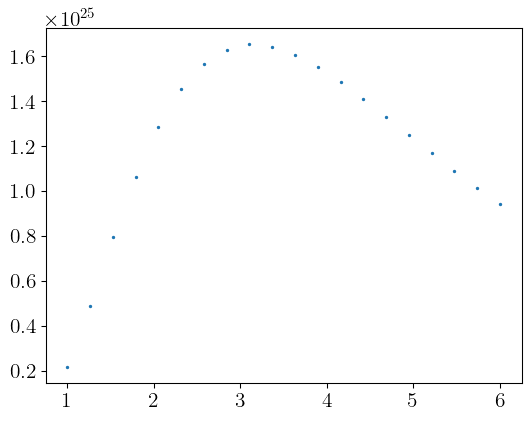

In [40]:
plt.scatter(lams, peak_Ls)

array([4.25321489e+12, 1.67091422e+12, 7.83883065e+11, 4.14914651e+11,
       2.39684077e+11, 1.47946540e+11, 9.61934388e+10, 6.52178299e+10,
       4.57660026e+10, 3.30551604e+10, 2.44663824e+10, 1.84946136e+10,
       1.42386571e+10, 1.11394791e+10, 8.83946763e+09, 7.10359830e+09,
       5.77367498e+09, 4.74092121e+09, 3.92909757e+09, 3.28383912e+09])

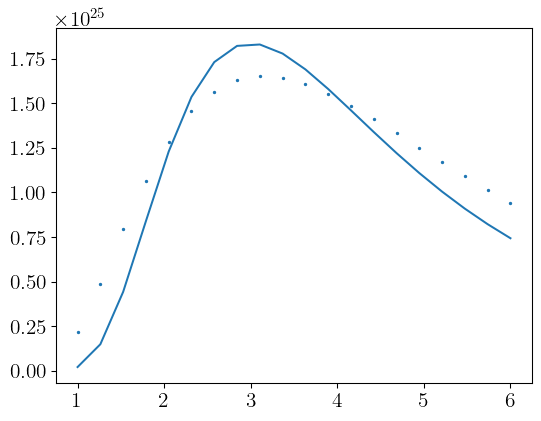

In [50]:
temp = 2898/3
plt.scatter(lams, peak_Ls)
A=6.34e9*0.9998920000000001
lams_cm = lams/1e4
plt.plot(lams, (A/lams_cm**5)*1/(np.exp(const.H_PLANCK*const.C_LIGHT/(const.K_B*lams_cm*temp))-1))
(A/lams**5)*1/(np.exp(const.H_PLANCK*const.C_LIGHT/(const.K_B*lams*temp))-1)

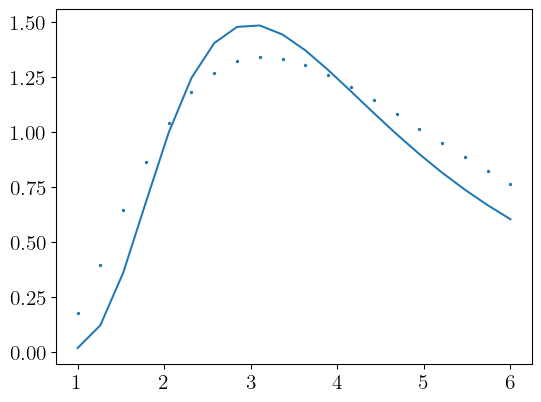

In [51]:
peak_Ls_norm = peak_Ls/np.mean(peak_Ls)
plt.scatter(lams, peak_Ls_norm)
A_norm = A/np.mean(peak_Ls)
lams_cm = lams/1e4
plt.plot(lams, (A_norm/lams_cm**5)*1/(np.exp(const.H_PLANCK*const.C_LIGHT/(const.K_B*lams_cm*temp))-1))
#(A/lams**5)*1/(np.exp(const.H_PLANCK*const.C_LIGHT/(const.K_B*lams*temp))-1)

966.0 5.148139818962545e-16
[9.60077601e+02 5.29861667e-16]


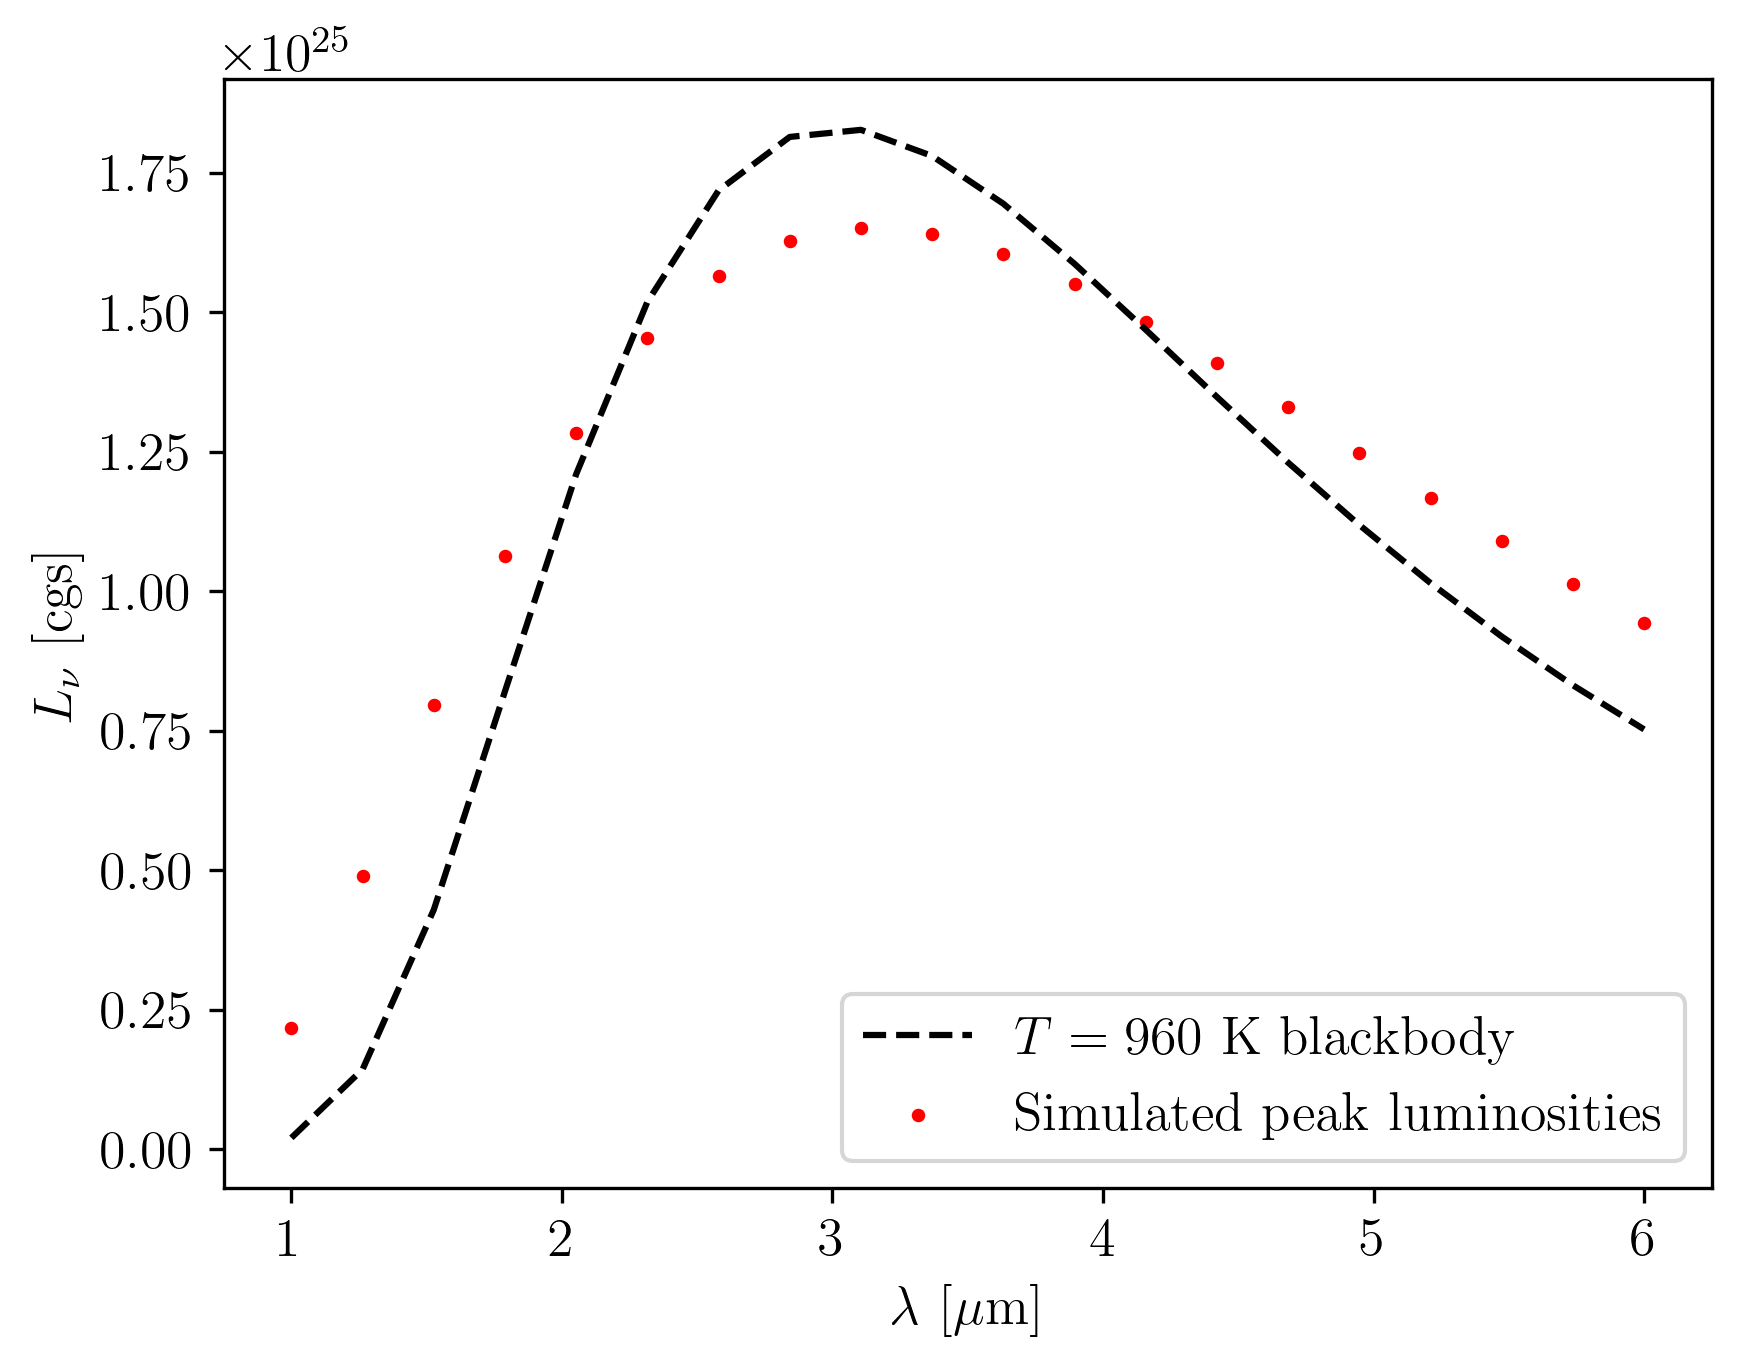

In [115]:
def BB_norm(wl, T, A):
    lams_cm = wl/1e4
    return (A/lams_cm**5)*1/(np.exp(const.H_PLANCK*const.C_LIGHT/(const.K_B*lams_cm*T))-1)

popt, pcov = curve_fit(BB_norm, lams, peak_Ls_norm, p0=[temp, A_norm])
print(temp, A_norm)
print(popt)

plt.plot(lams, np.mean(peak_Ls)*BB_norm(lams, popt[0], popt[1]), color="black", linestyle="--", label="$T=960$ K blackbody")
plt.scatter(lams, peak_Ls, color="red", label="Simulated peak luminosities", s=5)
plt.xlabel("$\\lambda$ [$\\mu$m]")
plt.ylabel("$L_{\\nu}$ [cgs]")
plt.legend()

Fitted Temperature (T): 966.0 K
Fitted Scaling Factor (A): 6339316147.124878


/home/nityanigam/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


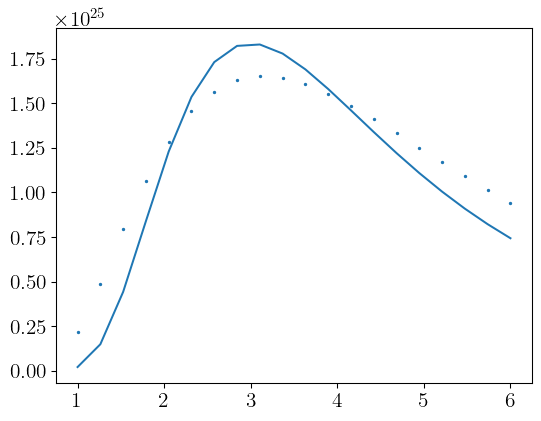

In [6]:
from scipy.optimize import curve_fit
import const

m = const.H_PLANCK*const.C_LIGHT/const.K_B
#def BB(wl, T, A):
#    wl_cm = wl/1e4
#    return A/((wl_cm**5) * (1/(np.exp(m/(wl_cm*T))-1)))

def BB(wl, T, A):
    lams_cm = wl/1e4
    return (A/lams_cm**5)*1/(np.exp(const.H_PLANCK*const.C_LIGHT/(const.K_B*lams_cm*temp))-1)

popt, pcov = curve_fit(BB, lams, peak_Ls, p0=[temp, 6.5e9])

#Extract the optimal values of T and A
T_fit, A_fit = popt

print(f"Fitted Temperature (T): {T_fit} K")
print(f"Fitted Scaling Factor (A): {A_fit}")

plt.plot(lams, BB(lams, T_fit, A_fit))
plt.scatter(lams, peak_Ls)

In [30]:
import emcee
import corner

scale_guess = 6.34e9
peak_Ls = peak_Ls/scale_guess

def log_likelihood(theta, lams, peak_Ls):
    T, A = theta
    model = BB(lams, T, A)/scale_guess
    sigma2 = 1  # Assuming errors are provided, otherwise use peak_Ls_err = 1
    return -0.5 * np.sum((peak_Ls - model) ** 2 / sigma2 + np.log(sigma2))

def log_prior(theta):
    T, A = theta
    if 0 < T < 4000 and 0.8 < A < 1.4:
        return 0.0
    return -np.inf

def log_posterior(theta, lams, peak_Ls):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, lams, peak_Ls)

In [33]:
initial = np.array([1000, 1])  # Initial guesses for T and A

# Number of dimensions
ndim = len(initial)

# Number of walkers
nwalkers = 50

# Initialize the walkers around the initial guess
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

# Set up the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(lams, peak_Ls))

# Run MCMC
sampler.run_mcmc(pos, 10000, progress=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:32<00:00, 306.51it/s]


State([[4.12708894e+01 9.99892462e-01]
 [9.40262980e+02 9.99892942e-01]
 [1.61616631e+03 9.99892040e-01]
 [3.23710110e+03 9.99892966e-01]
 [1.79593172e+03 9.99891427e-01]
 [3.23774811e+03 9.99892851e-01]
 [1.02826455e+03 9.99892500e-01]
 [2.99090948e+03 9.99892188e-01]
 [2.01782863e+03 9.99891813e-01]
 [3.36066945e+03 9.99891910e-01]
 [2.11489548e+02 9.99892050e-01]
 [3.52693436e+03 9.99891094e-01]
 [3.05873025e+03 9.99892764e-01]
 [3.90420430e+03 9.99889521e-01]
 [1.53705625e+03 9.99892048e-01]
 [2.36992400e+01 9.99892055e-01]
 [3.78354734e+02 9.99892316e-01]
 [4.30349859e+01 9.99891850e-01]
 [1.04537792e+03 9.99892043e-01]
 [3.95862231e+03 9.99891664e-01]
 [3.38960077e+03 9.99891318e-01]
 [2.11371006e+03 9.99893624e-01]
 [5.05291039e+02 9.99891592e-01]
 [3.06631909e+03 9.99892594e-01]
 [2.16086080e+03 9.99891470e-01]
 [2.36468299e+03 9.99891912e-01]
 [2.10103186e+03 9.99891983e-01]
 [1.66722574e+03 9.99891867e-01]
 [8.14586480e+01 9.99892137e-01]
 [1.53510373e+03 9.99892355e-01]
 [2.

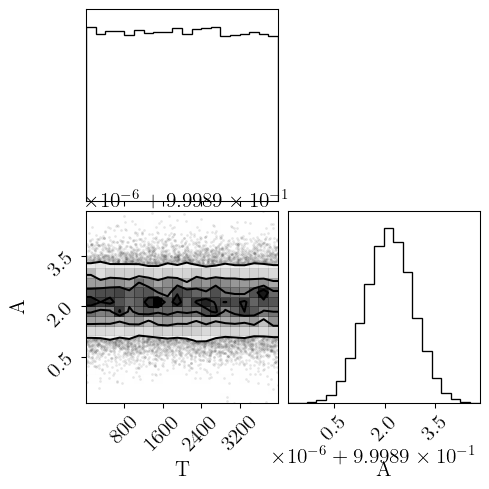

In [34]:
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Make the corner plot
fig = corner.corner(samples, labels=["T", "A"])
plt.show()

In [35]:
2*1e-6 + 9.9989*1e-1

0.9998920000000001